In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Load test dataset
X_test_path = "/media/tairo/Storages/DataSetAnimals/.npy format(-11)/X_test.npy"
y_test_path = "/media/tairo/Storages/DataSetAnimals/.npy format(-11)/y_test.npy"

In [6]:
X_test = np.load(X_test_path)
y_test = np.load(y_test_path)

In [7]:

# Convert labels to class indices (if needed)
num_classes = len(np.unique(y_test))  # Get number of classes
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes)  # Ensure categorical labelsb

In [8]:
# Load trained model
model_path = "Resnet50.keras"
model = tf.keras.models.load_model(model_path)

I0000 00:00:1741837592.248682  119110 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1898 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [9]:
# Make predictions
y_pred_probs = model.predict(X_test)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

I0000 00:00:1741837595.713890  119877 service.cc:148] XLA service 0x7d61900038b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741837595.721209  119877 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-13 10:46:35.781945: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741837596.160257  119877 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-13 10:46:36.888472: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1716', 220 bytes spill stores, 576 bytes spill loads



 1/10 ━━━━━━━━━━━━━━━━━━━━ 1:18 9s/step

I0000 00:00:1741837603.264551  119877 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 799ms/step


In [10]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


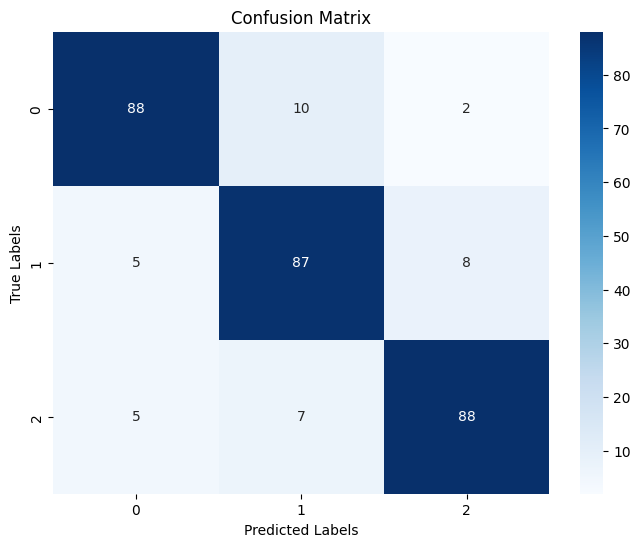

In [11]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()